<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1>

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li>

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

## Step 0: Load libraries and dataset

In [122]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [123]:
# Importing dataset
dataset = pd.read_csv('adult.csv')

## Step 1: Descriptive analysis

In [124]:
# Preview dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [125]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [126]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [127]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [128]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

,0
age,0.0 %
workclass,0.0 %
fnlwgt,0.0 %
education,0.0 %
education.num,0.0 %
marital.status,0.0 %
occupation,0.0 %
relationship,0.0 %
race,0.0 %
sex,0.0 %


In [129]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

,0
age,0.0 %
workclass,5.64 %
fnlwgt,0.0 %
education,0.0 %
education.num,0.0 %
marital.status,0.0 %
occupation,5.66 %
relationship,0.0 %
race,0.0 %
sex,0.0 %


In [130]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

,proportion
income,
<=50K,75.92 %
>50K,24.08 %


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1: Univariate Analysis

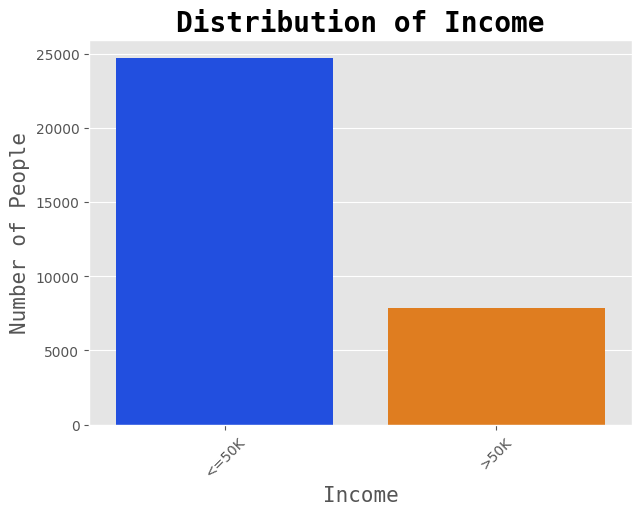

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is already defined and contains the 'income' column
income = dataset['income'].value_counts()

# Use a valid Matplotlib style
plt.style.use('ggplot')  # Using 'ggplot' since 'seaborn' is unavailable

# Create the figure
plt.figure(figsize=(7, 5))

# Correct barplot function with explicit x and y parameters
sns.barplot(x=income.index, y=income.values, palette='bright')

# Improve title and labels
plt.title('Distribution of Income', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Adjust tick labels
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.tick_params(labelsize=10)

# Show the plot
plt.show()



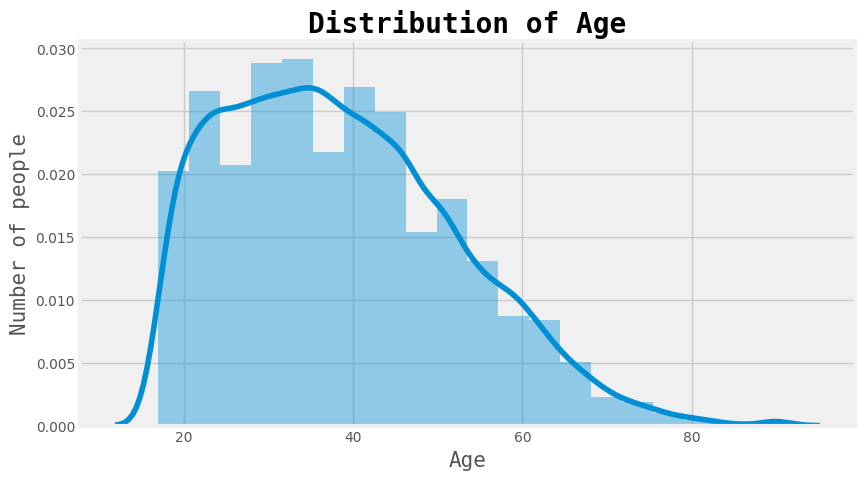

In [132]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

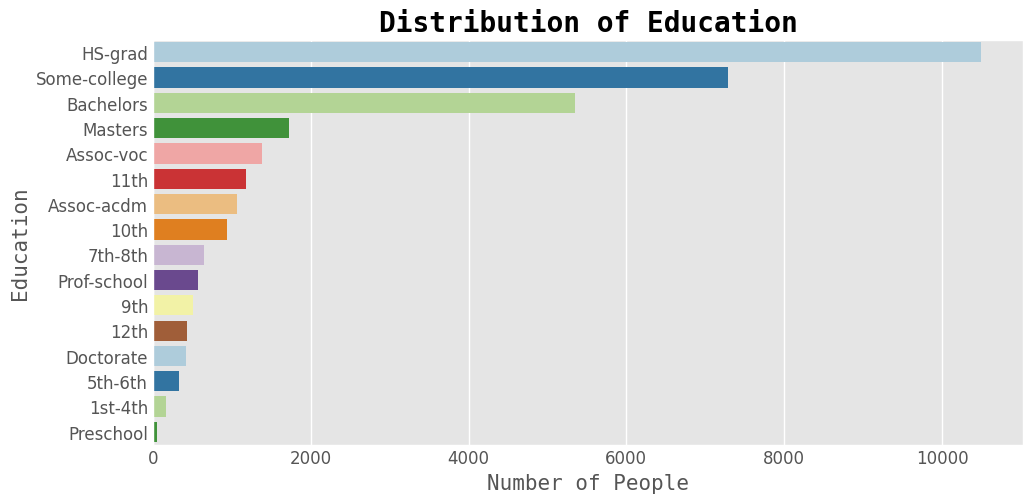

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is already defined and contains the 'education' column
edu = dataset['education'].value_counts()

# Use a valid Matplotlib style
plt.style.use('ggplot')

# Create the figure
plt.figure(figsize=(10, 5))

# Correct the barplot function with explicit x and y parameters
sns.barplot(x=edu.values, y=edu.index, palette='Paired')

# Improve title and labels
plt.title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Adjust tick labels
plt.tick_params(labelsize=12)

# Show the plot
plt.show()


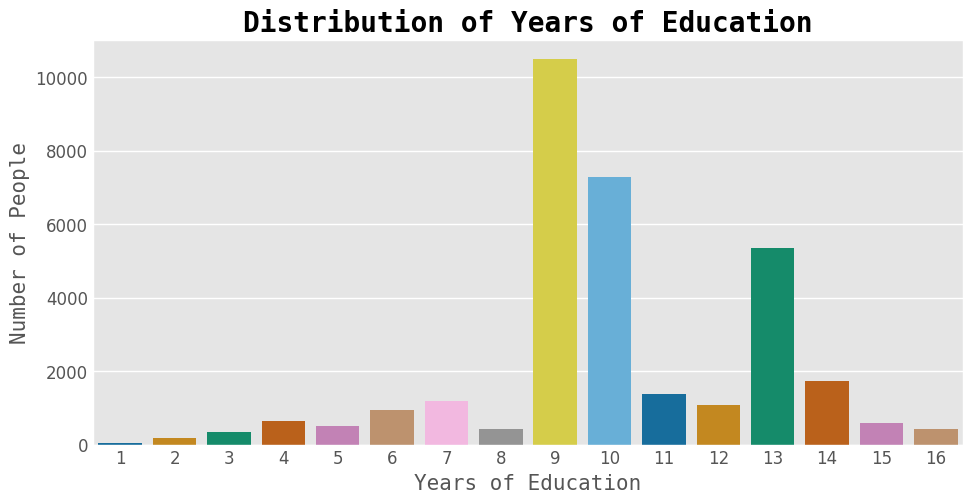

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is already defined and contains the 'education.num' column
edu_num = dataset['education.num'].value_counts().sort_index()  # Sort index for better ordering

# Use a valid Matplotlib style
plt.style.use('ggplot')

# Create the figure
plt.figure(figsize=(10, 5))

# Corrected barplot function with explicit x and y parameters
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')

# Improve title and labels
plt.title('Distribution of Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Adjust tick labels
plt.xticks(rotation=0)  # Keep the labels readable
plt.tick_params(labelsize=12)

# Show the plot
plt.show()


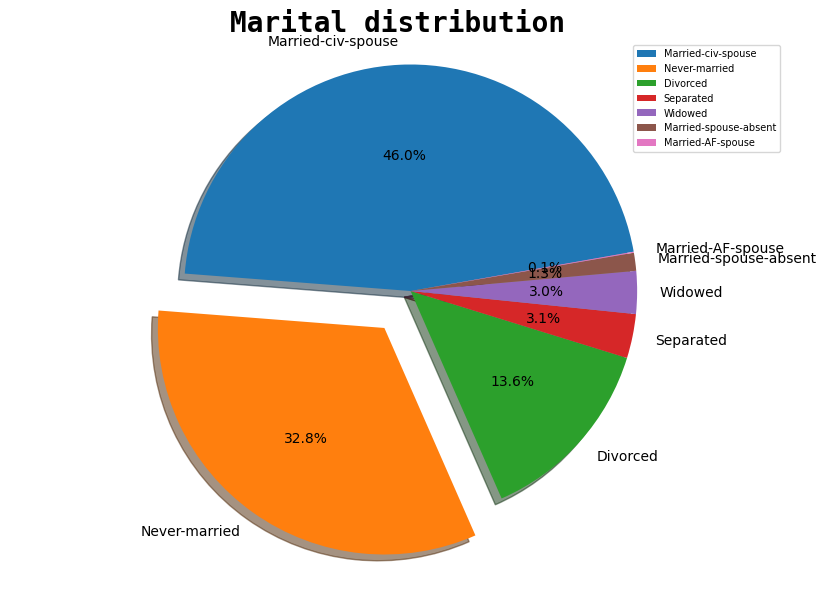

In [136]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

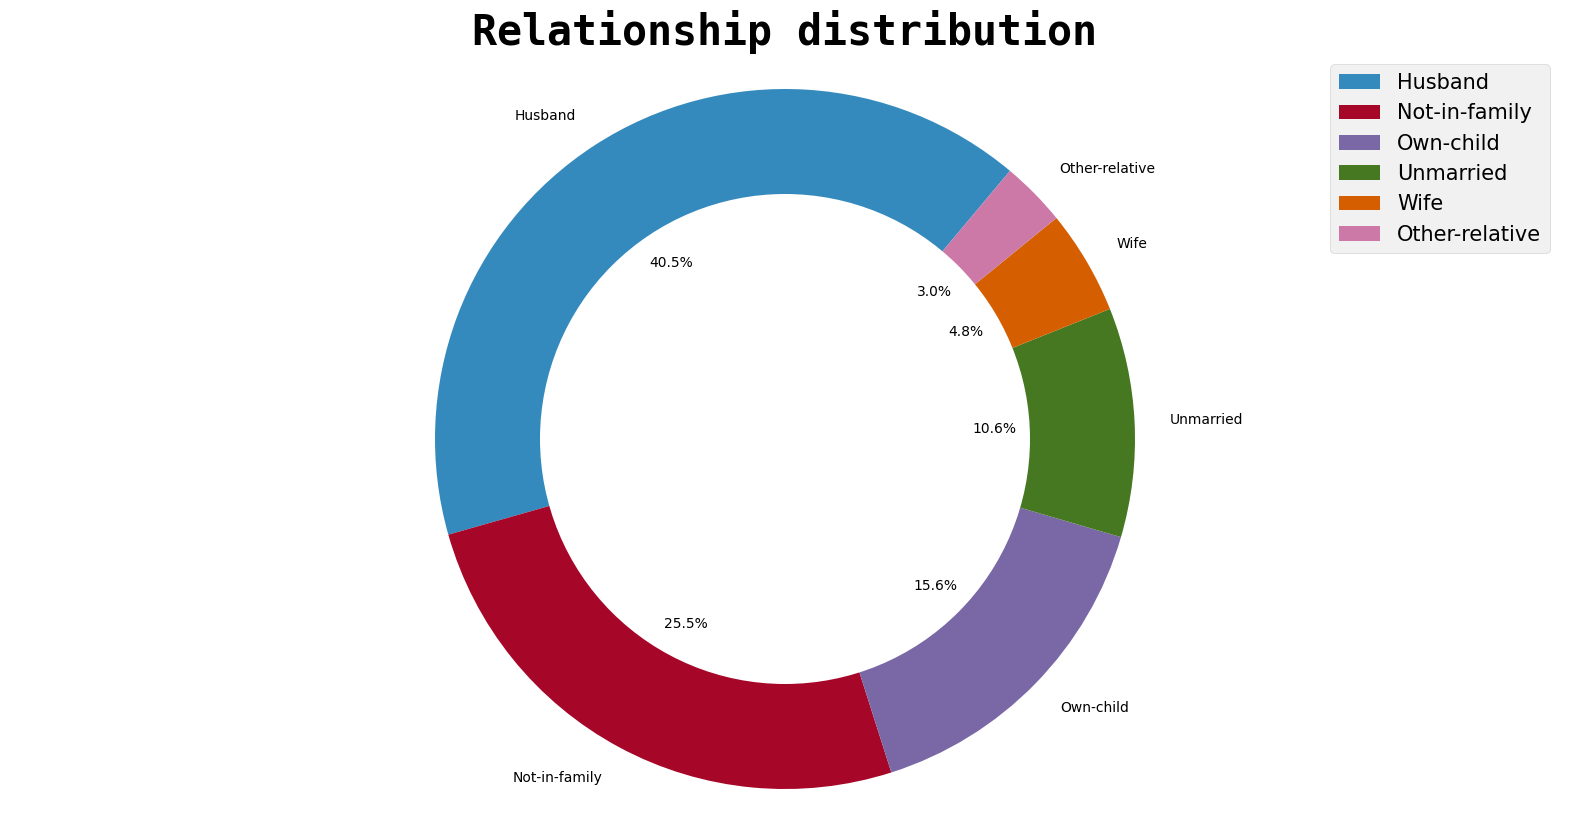

In [137]:
# Creating a donut chart for 'Age'
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

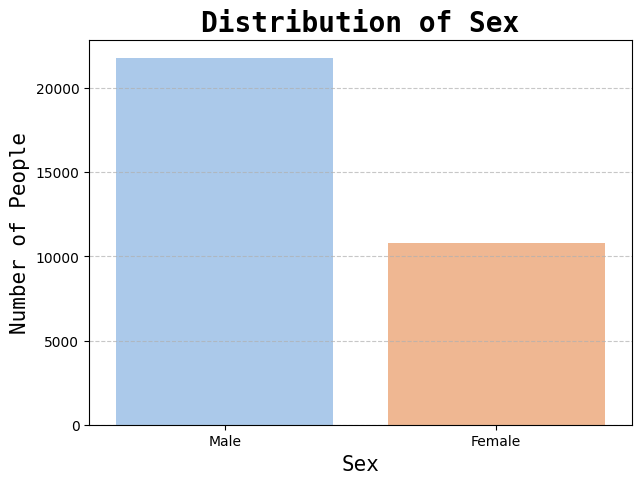

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is already defined and contains the 'sex' column
sex = dataset['sex'].value_counts()

# Use a valid Matplotlib style
plt.style.use('default')

# Create the figure
plt.figure(figsize=(7, 5))

# Corrected barplot function with explicit x and y parameters
sns.barplot(x=sex.index, y=sex.values, palette='pastel')

# Improve title and labels
plt.title('Distribution of Sex', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Adjust tick labels
plt.tick_params(labelsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [139]:
!pip install squarify


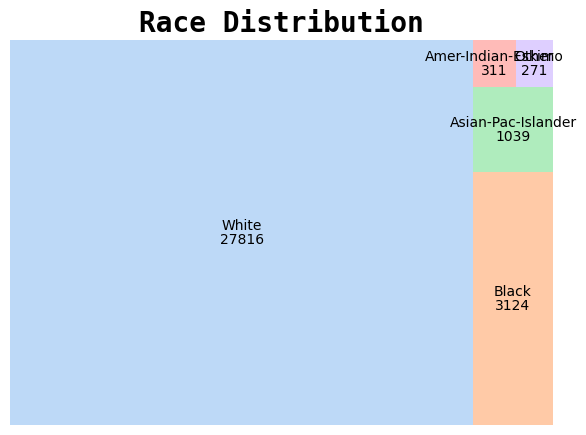

In [140]:
import matplotlib.pyplot as plt
import squarify  # Make sure it's installed

# Assuming 'dataset' is already defined and contains the 'race' column
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))

# Treemap plot with better styling
squarify.plot(sizes=race.values, label=race.index, value=race.values, alpha=0.7, color=sns.color_palette("pastel"))

# Improve title
plt.title('Race Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

# Remove axes for cleaner look
plt.axis('off')

# Show the plot
plt.show()


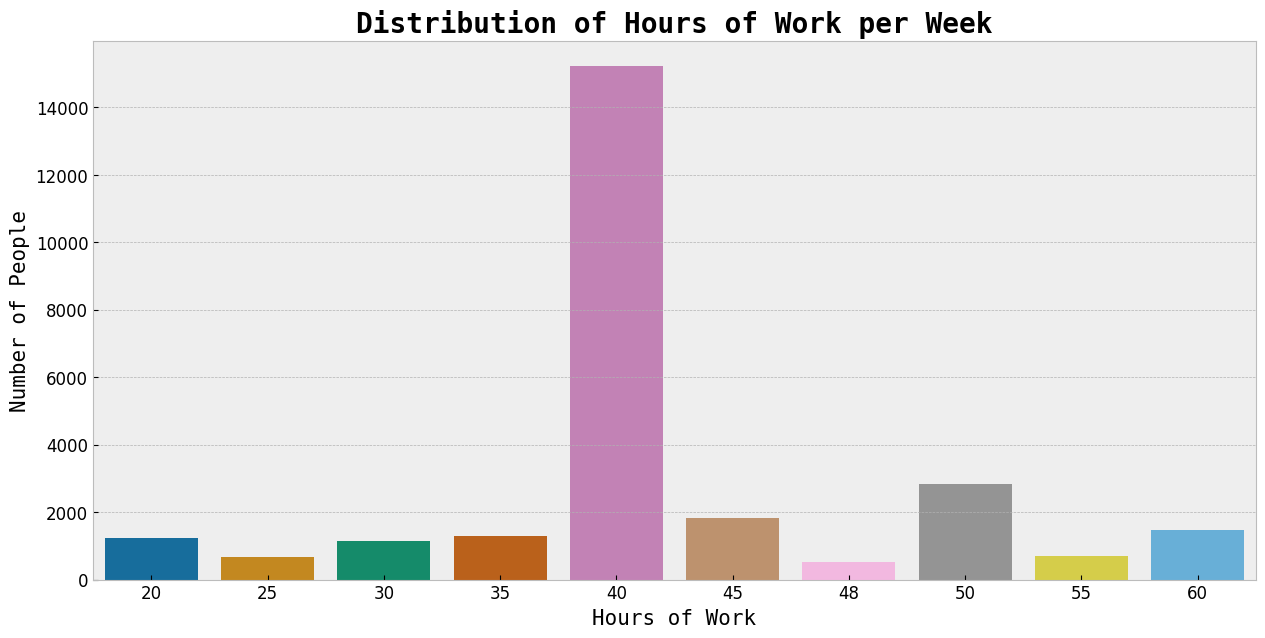

In [141]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))

# Use keyword arguments for x and y
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')

plt.title('Distribution of Hours of Work per Week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of Work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


### 2.2 Bivariate Analysis

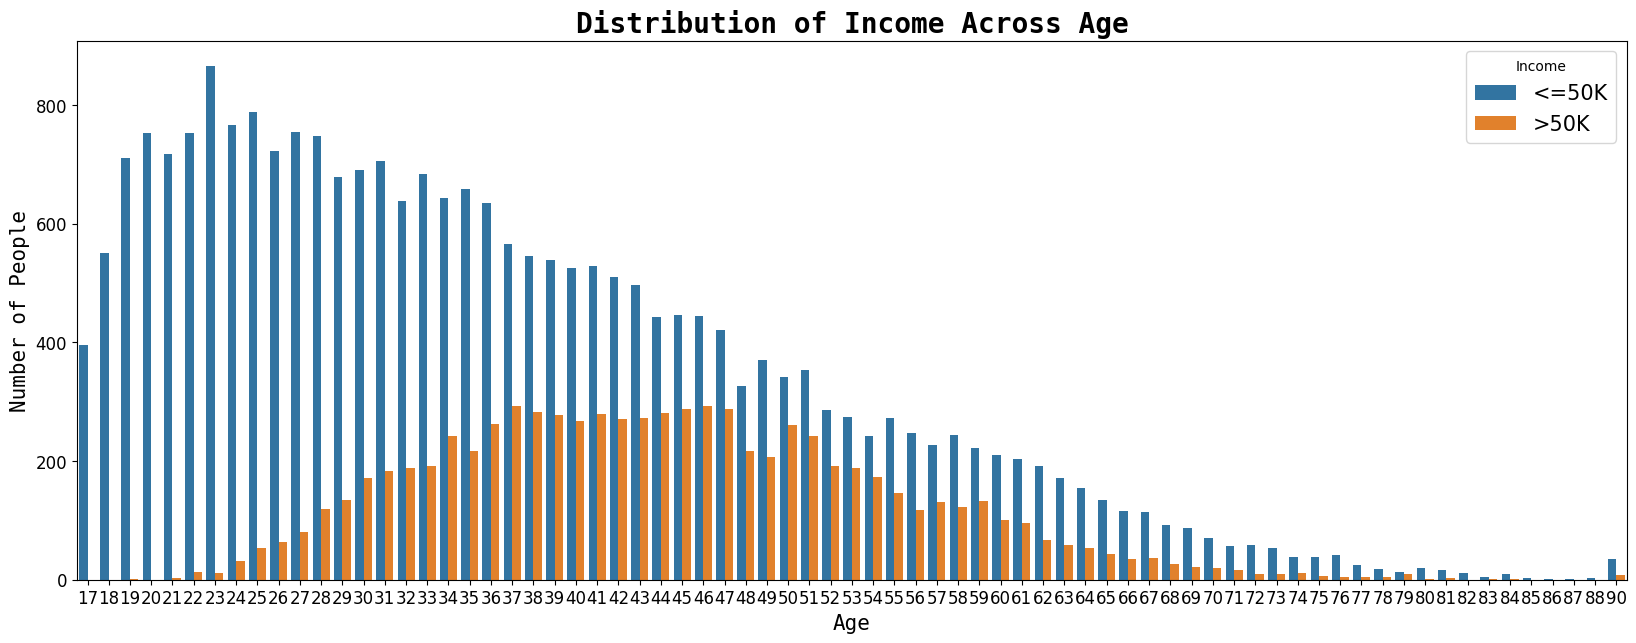

In [142]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))

# Use keyword arguments for x and hue
sns.countplot(x=dataset['age'], hue=dataset['income'])

plt.title('Distribution of Income Across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(title='Income', loc='upper right', prop={'size': 15})
plt.show()


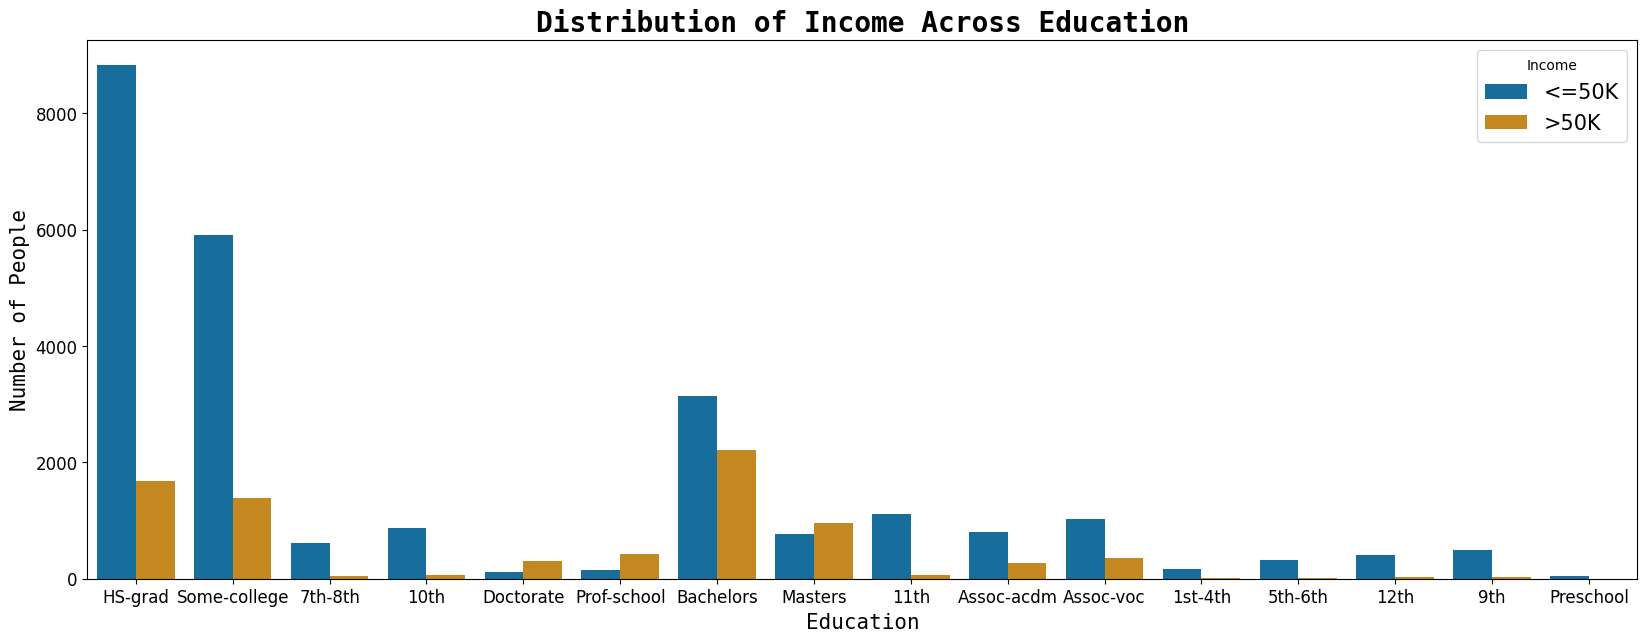

In [143]:
# Creating a countplot of income across education
import matplotlib.pyplot as plt
import seaborn as sns

# Use the default style instead
plt.style.use('default')

plt.figure(figsize=(20, 7))

# Use keyword arguments for x and hue
sns.countplot(x=dataset['education'], hue=dataset['income'], palette='colorblind')

plt.title('Distribution of Income Across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(title='Income', loc='upper right', prop={'size': 15})
plt.show()


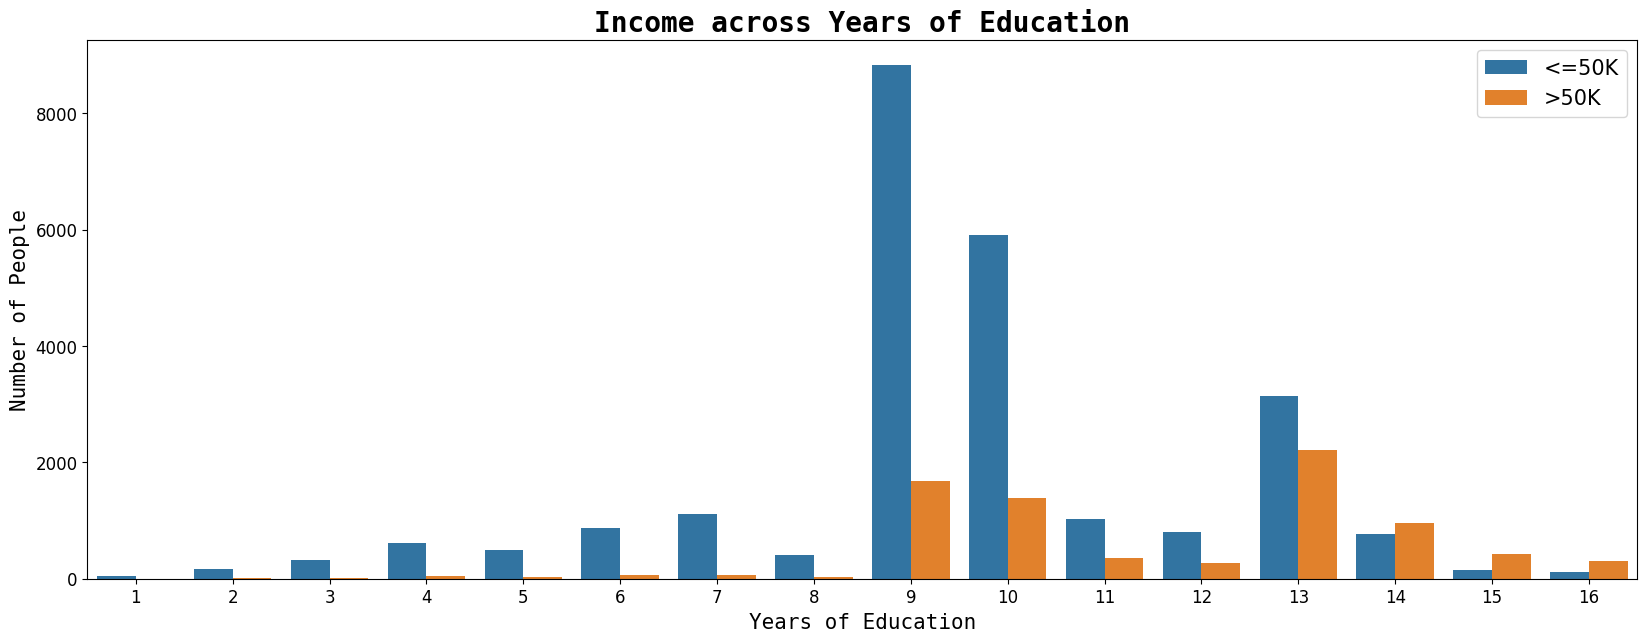

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid style (like 'default')
plt.style.use('default')

# Create the plot
plt.figure(figsize=(20, 7))

# Create the countplot with hue for income
sns.countplot(x=dataset['education.num'], hue=dataset['income'])

# Add title and labels with custom font settings
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Customize tick parameters and legend
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

# Save the figure (ensure the directory exists)
plt.savefig('bi2.png')

# Show the plot
plt.show()


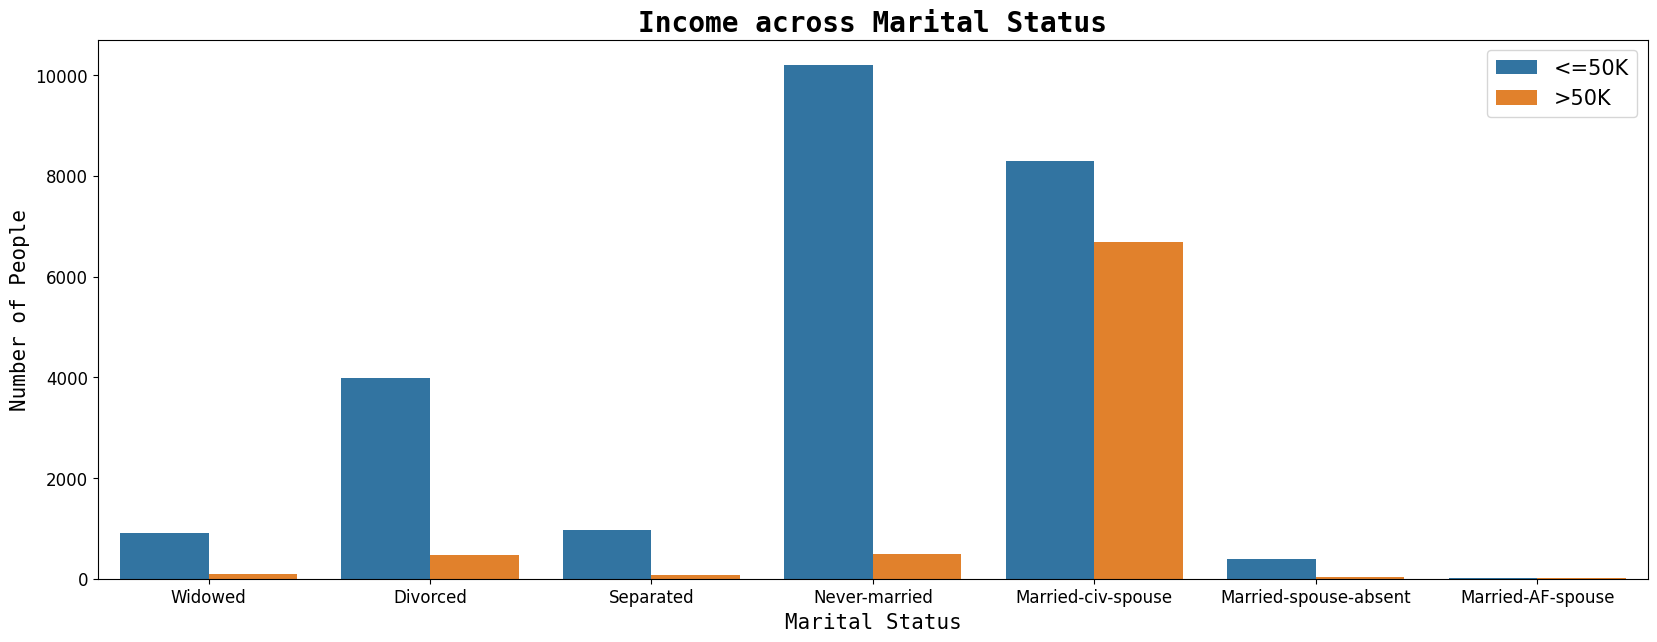

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid style (if 'seaborn' isn't available, use 'default')
plt.style.use('default')

# Create the figure
plt.figure(figsize=(20, 7))

# Create the countplot with hue for income
sns.countplot(x=dataset['marital.status'], hue=dataset['income'])

# Add title and labels with custom font settings
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Customize tick parameters and legend
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

# Show the plot
plt.show()


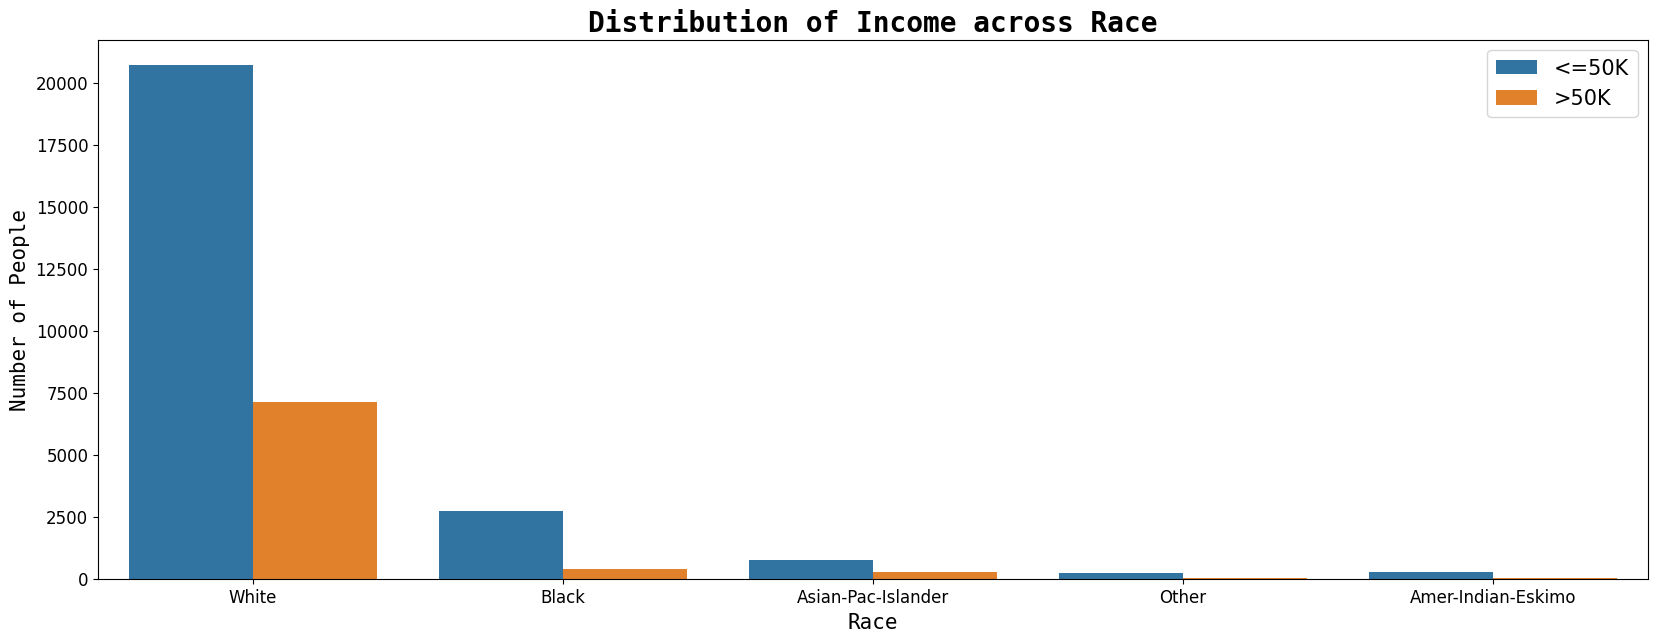

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid style, 'default' if 'fivethirtyeight' is not available
plt.style.use('default')

# Create the figure
plt.figure(figsize=(20, 7))

# Create the countplot with hue for income
sns.countplot(x=dataset['race'], hue=dataset['income'])

# Add title and labels with custom font settings
plt.title('Distribution of Income across Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Customize tick parameters and legend
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

# Show the plot
plt.show()


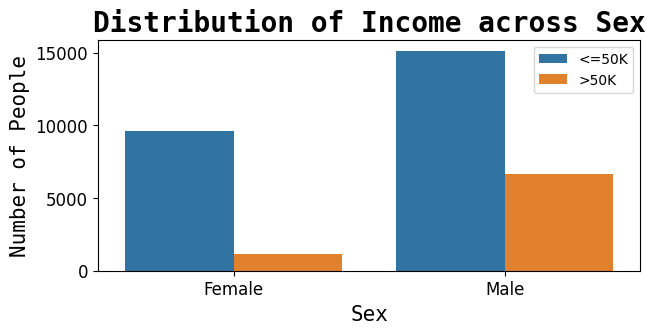

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid style, 'default' if 'fivethirtyeight' is not available
plt.style.use('default')

# Create the figure
plt.figure(figsize=(7, 3))

# Create the countplot with hue for income
sns.countplot(x=dataset['sex'], hue=dataset['income'])

# Add title and labels with custom font settings
plt.title('Distribution of Income across Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of People', fontdict={'fontname': 'Monospace', 'fontsize': 15})

# Customize tick parameters and legend
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})

# Save the figure to a file
plt.savefig('bi3.png')

# Show the plot
plt.show()


### 2.3: Multivariate Analysis

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [149]:
dataset['income'] = le.fit_transform(dataset['income'])

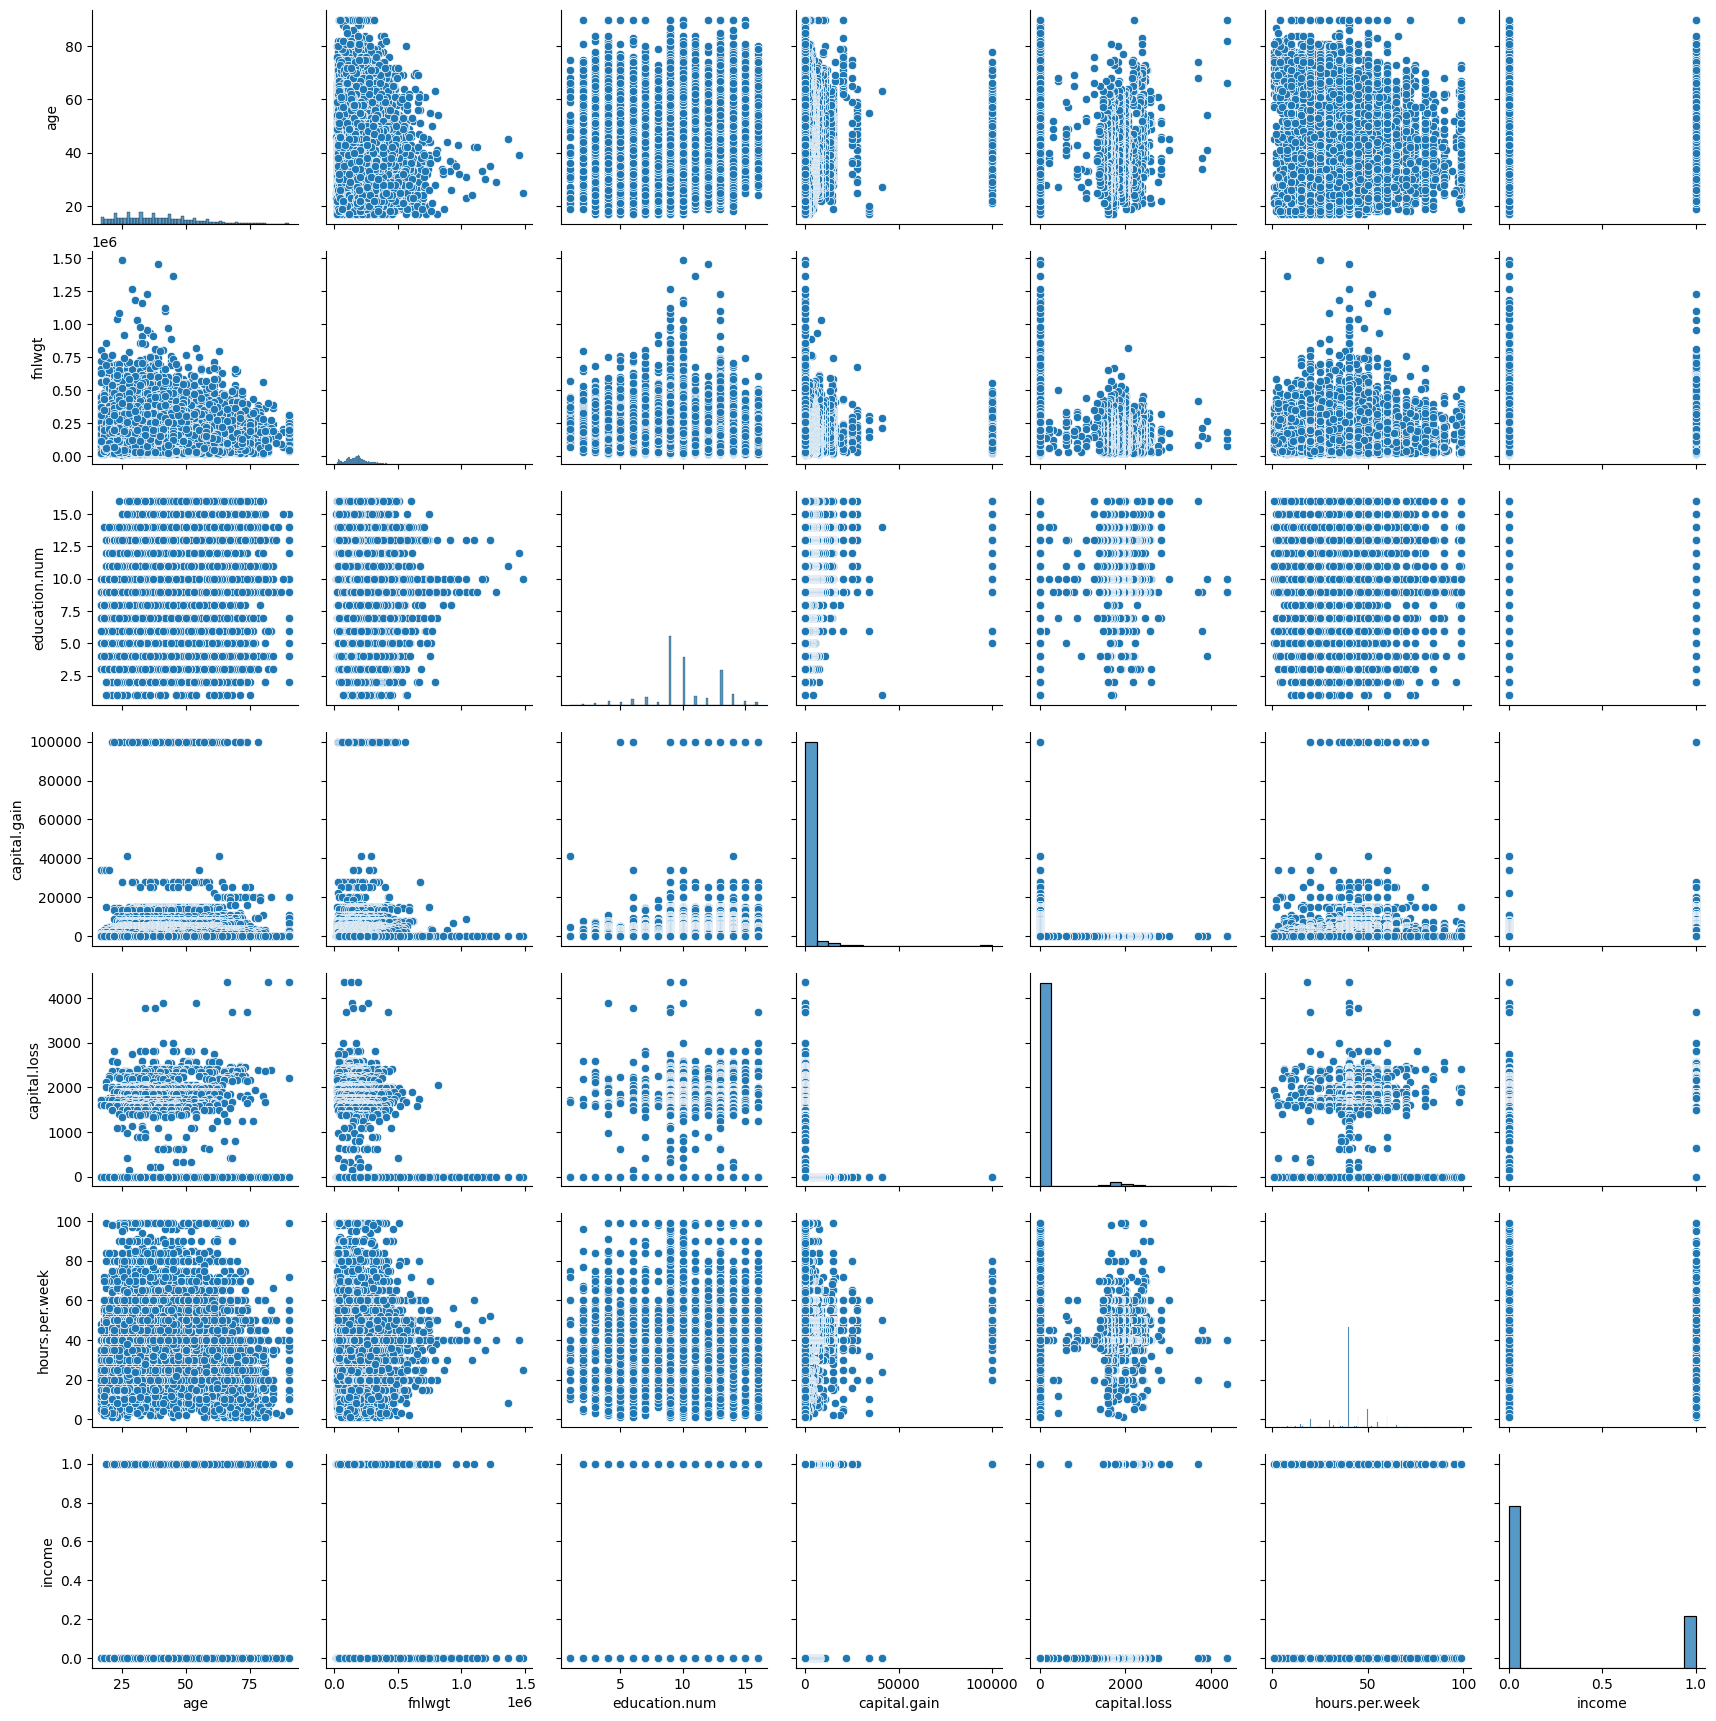

In [150]:
# Creating a pairplot of dataset
sns.pairplot(dataset)
plt.savefig('multi1.png')
plt.show()

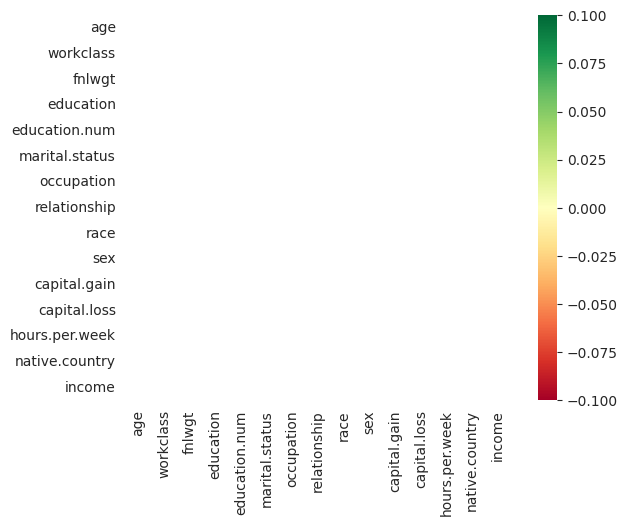

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values by replacing '?' with NaN
dataset.replace('?', np.nan, inplace=True)

# Convert all columns to numeric values, coercing errors into NaN (non-numeric values)
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (optional, you can also use imputation methods)
dataset.dropna(inplace=True)

# Ensure we only use numeric columns for correlation
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix only for numeric columns
corr = dataset[numeric_columns].corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the plot with a specific style
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn', linewidths=0.5)

# Save the plot as an image
plt.savefig('multi2.png')

# Show the plot
plt.show()




<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Fixing '?' values in the dataset

In [152]:
dataset = dataset.replace('?', np.nan)

In [153]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

,0
age,nan %
workclass,nan %
fnlwgt,nan %
education,nan %
education.num,nan %
marital.status,nan %
occupation,nan %
relationship,nan %
race,nan %
sex,nan %


In [154]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [155]:
# List columns with NaN values
columns_with_nan = dataset.columns[dataset.isna().any()].tolist()

# Iterate over each column with NaN values
for col in columns_with_nan:
    # Check if the mode() returns a valid value and fill NaN
    mode_value = dataset[col].mode()
    if not mode_value.empty:
        dataset[col].fillna(mode_value[0], inplace=True)
    else:
        print(f"Column {col} has no mode value.")


### 3.2: Label Encoding

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

### 3.3: Feature Selection

In [158]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [159]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [160]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already loaded the dataset
# dataset = pd.read_csv('your_dataset.csv')  # Uncomment and load your dataset

# Print the column names to verify the target column
print("Columns in dataset:", dataset.columns)

# Handle missing values for each column individually
for col in dataset.columns:
    # Check if the column contains missing values
    if dataset[col].isnull().sum() > 0:
        # If it's a categorical column (object type), replace with the mode
        if dataset[col].dtype == 'object':
            mode_value = dataset[col].mode()
            if not mode_value.empty:  # Check if mode is found
                dataset[col].fillna(mode_value[0], inplace=True)
            else:
                print(f"Warning: No mode found for column {col}.")
        # If it's a numeric column, replace with the mean or median
        else:
            dataset[col].fillna(dataset[col].median(), inplace=True)

# Manually set the target_column to the correct column name (Replace 'target_column_name' with actual column)
target_column = 'your_target_column_name'  # Replace with the actual target column name

# Check if target_column exists in the dataset
if target_column not in dataset.columns:
    print(f"Error: '{target_column}' column not found in the dataset.")
else:
    # Separate features (X) and target variable (Y)
    X = dataset.drop(columns=[target_column])  # Drop the target column from the features
    Y = dataset[target_column]  # Use the correct target column

    # Debugging: Check the shape of X and Y
    print("Shape of X:", X.shape)
    print("Shape of Y:", Y.shape)

    # Ensure that X and Y are not empty
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print("Error: Feature matrix X or target vector Y is empty.")
    else:
        # Split the data into training and testing sets (optional, depending on your workflow)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        # Check shapes after splitting
        print(f"Shape of X_train: {X_train.shape}")
        print(f"Shape of Y_train: {Y_train.shape}")
        print(f"Shape of X_test: {X_test.shape}")
        print(f"Shape of Y_test: {Y_test.shape}")

        # Initialize the model (Extra Trees Classifier in this case)
        selector = ExtraTreesClassifier(n_estimators=100, random_state=42)

        # Fit the model with the training data
        selector.fit(X_train, Y_train)

        # Check feature importances if needed
        print("Feature importances:", selector.feature_importances_)

        # Make predictions using the model
        Y_pred = selector.predict(X_test)
        print("Predictions:", Y_pred)

        # Example: Evaluate the model (accuracy or other metrics)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(Y_test, Y_pred)
        print(f"Model Accuracy: {accuracy * 100:.2f}%")




Columns in dataset: Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
Error: 'your_target_column_name' column not found in the dataset.


In [161]:
target_column = 'income'  # Replace with your actual target column name
X = dataset.drop(columns=[target_column])  # Drop the target column from the features
Y = dataset[target_column]  # Separate the target variable



In [162]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

### 3.4: Feature Scaling

In [163]:
from sklearn.preprocessing import StandardScaler

### 3.5: Fixing imbalanced dataset using Oversampling

In [164]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

,proportion
income,


Data Modelling

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.
</p></li>    

<li><p style="font-family:verdana;">
A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.
</p></li>    

</ul>

</div>

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Future work:</h3>

<ul>
        
<li><p style="font-family:verdana;">
We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.
</p></li>    

</ul>

</div>